In [1]:
import os, json, random, csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate

sns.set(style = "darkgrid")

from sklearn.manifold import TSNE
path = './info/'
case = '17-43'
seed = 13
with open(path+'ral_spkr_dict.json') as j:
    spkr_dict = json.load(j)

# Test Case Segmentation Plot (Case 17-571)

In [2]:
predict = case+'_rdsv.rttm'
ral_label = case+'_ral.rttm'

predictions = load_rttm(path+predict)[case]
unref_gt = load_rttm(path+ral_label)[case]
groundtruths = load_rttm(path+case+'.rttm')[case]

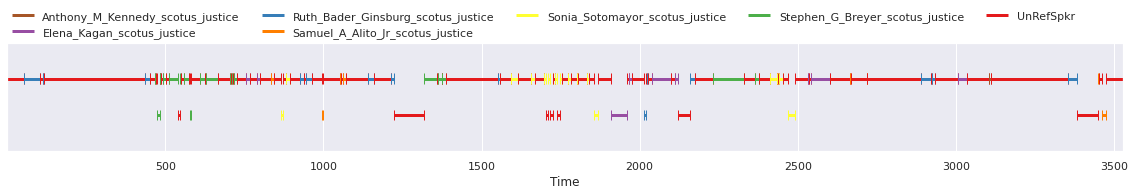

In [3]:
predictions

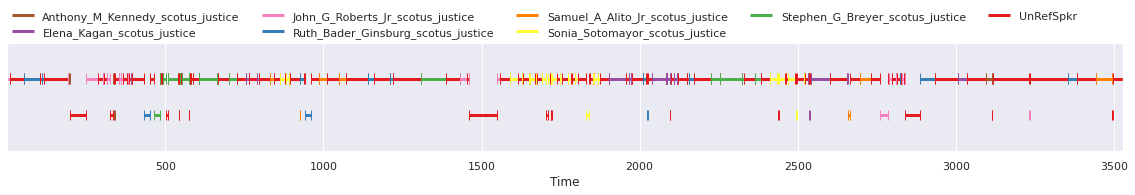

In [4]:
unref_gt

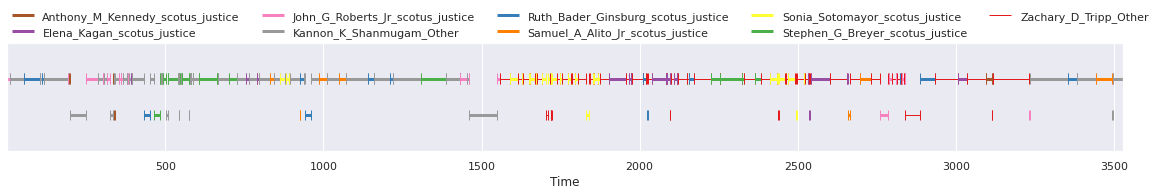

In [5]:
groundtruths

# Test Performance by case

In [6]:
test =[]
der = []
sz = []
szVAD=[]
with open(path+'test_eval.csv') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        test.append(row)
final = test[-1]
test = test[1:-1]

for r in test:
    size = r[-1].replace('(', '').replace(')', '').replace(' ','').split(',')
    der.append(float(r[1]))
    sz.append(float(size[1]))
    szVAD.append(float(size[0]))

In [7]:
with open(path+'lr_dict.json') as g:
    lr = json.load(g)

In [8]:
final

['25',
 '(0.07312807928506655, 0.19841226686966318)',
 '0.1375505659968204',
 '0.001290911959154816',
 '-0.0052716726296554725',
 '-0.9617906138363139']

In [9]:
stats.describe(sz)

DescribeResult(nobs=25, minmax=(49.289, 64.893), mean=58.9105, variance=11.875387770833333, skewness=-0.8524362554936794, kurtosis=0.6747191613662444)

In [10]:
stats.describe(szVAD)

DescribeResult(nobs=25, minmax=(43.236, 58.498000000000005), mean=51.36653999999999, variance=11.861729498333338, skewness=-0.5033575013439394, kurtosis=0.12157562824785151)

In [11]:
lr

{'1': [0.8411, 0.7941, 0.6517],
 '3': [0.8175, 0.8348, 0.7885],
 '5': [0.8011, 0.83, 0.8183],
 '7': [0.7866, 0.8218, 0.8298]}

# TSNE

### rate=1 (min)

In [26]:
pt1 = 'r1/'
X1 = np.load(pt1+'X.npy')
Y1 = np.load(pt1+'Y.npy')

y_scotus1 = []
for i in Y1:
    y_scotus1.append(list(spkr_dict.keys())[list(spkr_dict.values()).index(i)])
      
tsne1 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200, random_state=seed)
tsne_results1 = tsne1.fit_transform(X1)
tsne_df_scale1 = pd.DataFrame(tsne_results1, columns=['tsne1', 'tsne2'])
labels_tsne_scale1 = Y1
clusters_tsne_scale1 = pd.concat([tsne_df_scale1, pd.DataFrame({'tsne_clusters':labels_tsne_scale1})], axis=1)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7479 samples in 0.329s...
[t-SNE] Computed neighbors for 7479 samples in 67.770s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7479
[t-SNE] Computed conditional probabilities for sample 2000 / 7479
[t-SNE] Computed conditional probabilities for sample 3000 / 7479
[t-SNE] Computed conditional probabilities for sample 4000 / 7479
[t-SNE] Computed conditional probabilities for sample 5000 / 7479
[t-SNE] Computed conditional probabilities for sample 6000 / 7479
[t-SNE] Computed conditional probabilities for sample 7000 / 7479
[t-SNE] Computed conditional probabilities for sample 7479 / 7479
[t-SNE] Mean sigma: 0.190761
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.526733
[t-SNE] KL divergence after 5000 iterations: 1.821471


/home/jtumm13d/anaconda3/envs/audio/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


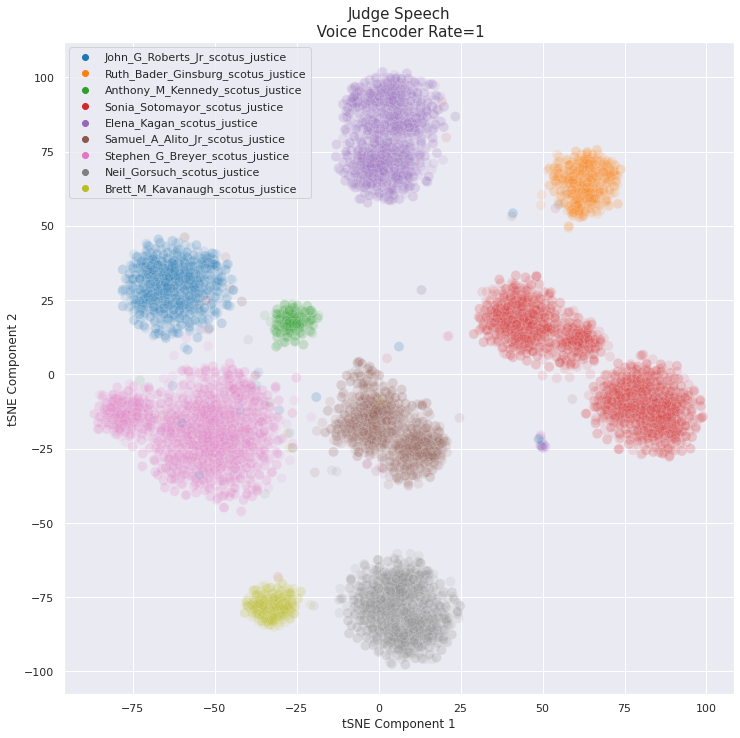

In [31]:
plt.figure(figsize = (12,12))
sns.scatterplot(clusters_tsne_scale1.iloc[:,0],clusters_tsne_scale1.iloc[:,1],hue=y_scotus1, palette='tab10', s=100, alpha=0.1).set_title('Judge Speech\n Voice Encoder Rate=1', fontsize=15)
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.show()

### rate=5 (utilized on test)

In [28]:
pt5 = 'r5/'
X5 = np.load(pt5+'X.npy')
Y5 = np.load(pt5+'Y.npy')

y_scotus5 = []
for i in Y5:
    y_scotus5.append(list(spkr_dict.keys())[list(spkr_dict.values()).index(i)])
      
tsne5 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200, random_state=seed)
tsne_results5 = tsne5.fit_transform(X5)
tsne_df_scale5 = pd.DataFrame(tsne_results5, columns=['tsne1', 'tsne2'])
labels_tsne_scale5 = Y5
clusters_tsne_scale5 = pd.concat([tsne_df_scale5, pd.DataFrame({'tsne_clusters':labels_tsne_scale5})], axis=1)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 37347 samples in 5.506s...
[t-SNE] Computed neighbors for 37347 samples in 1183.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 37347
[t-SNE] Computed conditional probabilities for sample 2000 / 37347
[t-SNE] Computed conditional probabilities for sample 3000 / 37347
[t-SNE] Computed conditional probabilities for sample 4000 / 37347
[t-SNE] Computed conditional probabilities for sample 5000 / 37347
[t-SNE] Computed conditional probabilities for sample 6000 / 37347
[t-SNE] Computed conditional probabilities for sample 7000 / 37347
[t-SNE] Computed conditional probabilities for sample 8000 / 37347
[t-SNE] Computed conditional probabilities for sample 9000 / 37347
[t-SNE] Computed conditional probabilities for sample 10000 / 37347
[t-SNE] Computed conditional probabilities for sample 11000 / 37347
[t-SNE] Computed conditional probabilities for sample 12000 / 37347
[t-SNE] Computed conditional probabilities for

/home/jtumm13d/anaconda3/envs/audio/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


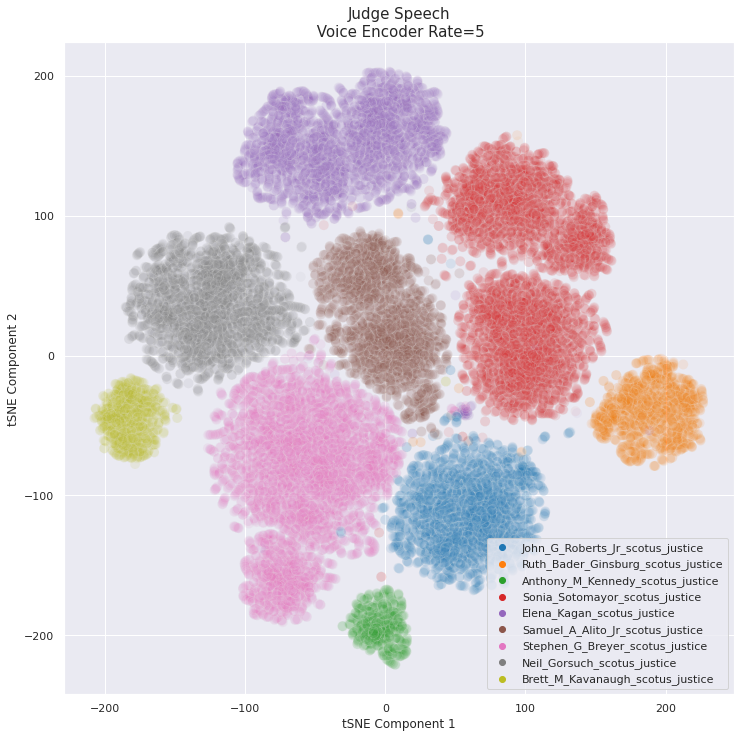

In [32]:
plt.figure(figsize = (12,12))
sns.scatterplot(clusters_tsne_scale5.iloc[:,0],clusters_tsne_scale5.iloc[:,1],hue=y_scotus5, palette='tab10', s=100, alpha=0.05).set_title('Judge Speech\n Voice Encoder Rate=5', fontsize=15)
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.show()